
[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


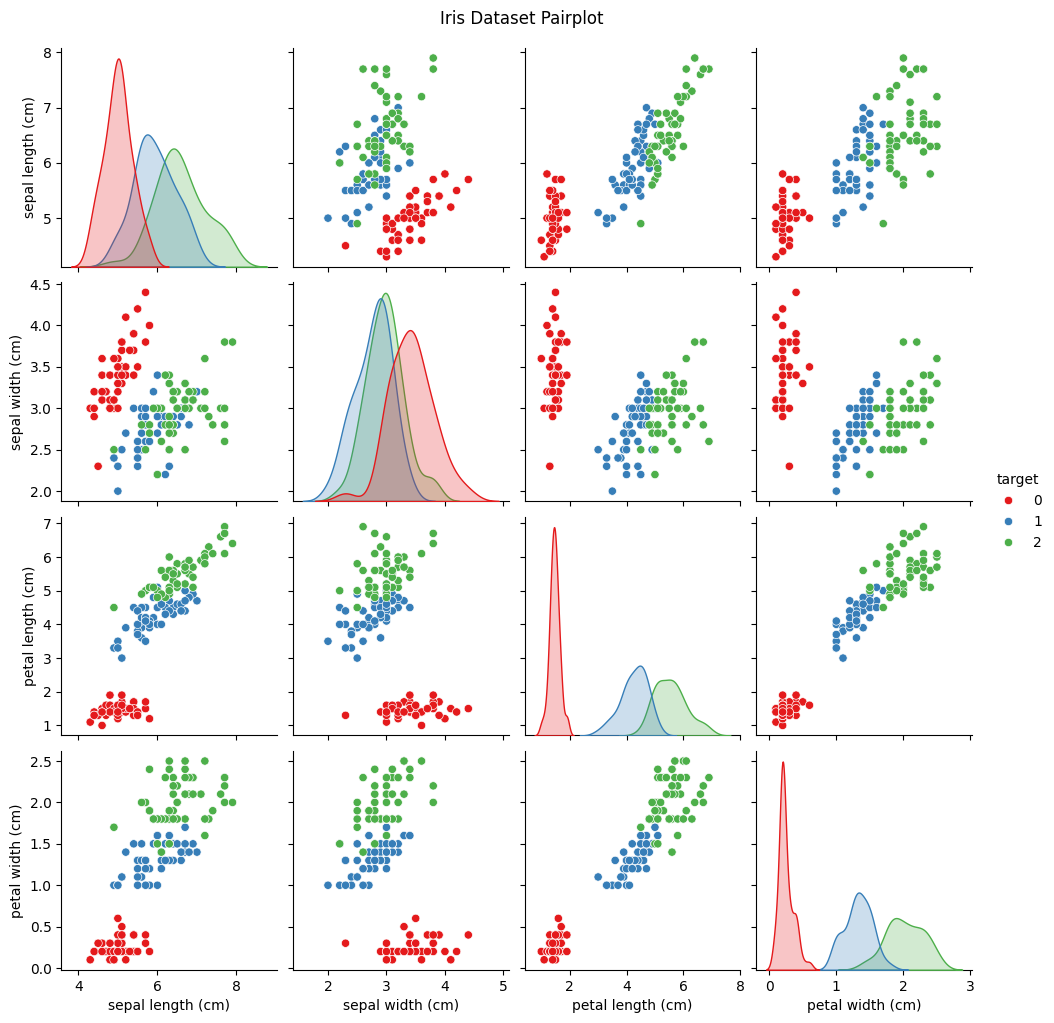

✅ Accuracy: 1.0

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



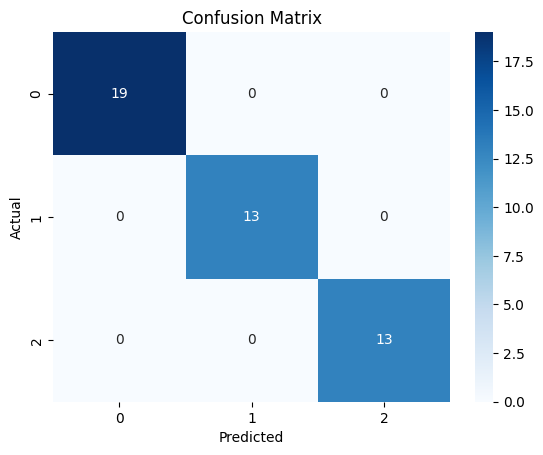

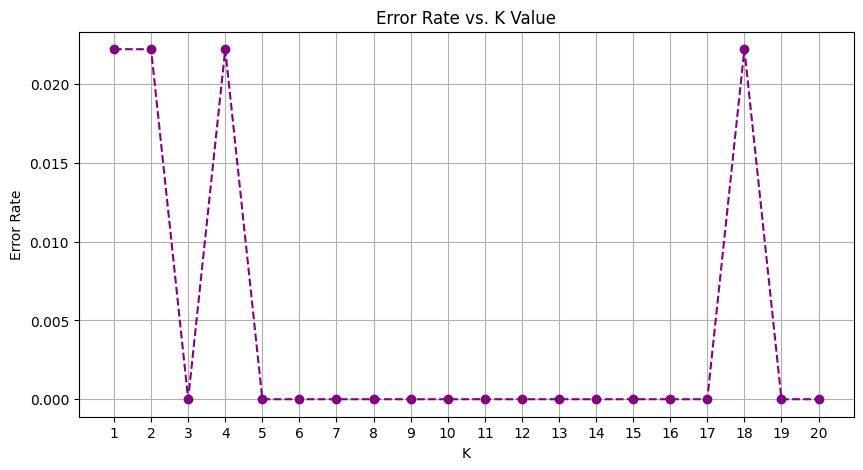

In [2]:
# Install necessary libraries (only once)
!pip install numpy pandas matplotlib seaborn scikit-learn

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Visualize with pairplot
sns.pairplot(df, hue='target', palette='Set1')
plt.suptitle('Iris Dataset Pairplot', y=1.02)
plt.show()

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test set
y_pred = knn.predict(X_test)

# Accuracy and performance report
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: test accuracy for different k values
error_rate = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred_k = model.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, pred_k))

# Plotting error rate
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), error_rate, marker='o', linestyle='--', color='purple')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()
